# Unsupervised Kernel Methods

Course: Machine Learning II, Data Science Master (Universidad de Cantabria - UIMP).  
Lecturer: Steven Van Vaerenbergh.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# inline plots
%matplotlib inline

# use seaborn plotting defaults
import seaborn as sns; sns.set()

# Kernel PCA

Kernel PCA is the extension of PCA to the kernel feature space.

Typical applications of kernel PCA include:
- Nonlinear dimensionality reduction
- Nonlinear correlation analysis
- Noise reduction

## Algorithm

1. Obtener la matriz kernel ${\bf K}$ con entradas $\kappa({\bf x}_i, {\bf x}_j)$
2. Centrar la matriz ${\bf K}_c = \left({\bf I} - {\bf 1}{\bf 1}^T\right) {\bf K} \left({\bf I} -{\bf 1}{\bf 1}^T \right)$
3. $[{\bf V}, \boldsymbol{\Lambda}] = {\rm eig}({\bf K}_c)$
4. $\boldsymbol{\alpha}_j = \lambda_j^{-1/2} {\bf v}_j$, $j= 1,\ldots,r$
5. for $i=1:n$
    - ${\bf k}_i = \begin{bmatrix} \kappa({\bf x}_i, {\bf x}_1) & \ldots &  \kappa({\bf x}_i, {\bf x}_n) \end{bmatrix}^T$
    - ${\bf y}_i = \begin{bmatrix} \boldsymbol{\alpha}_1^T {\bf k}_i& \ldots &  \boldsymbol{\alpha}_r^T {\bf k}_i \end{bmatrix}^T $

## scikit-learn implementation

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html

# Part 1. Kernel PCA for dimensionality reduction

## Data sets

First, we will generate some synthetic data sets.

## Two circles data set

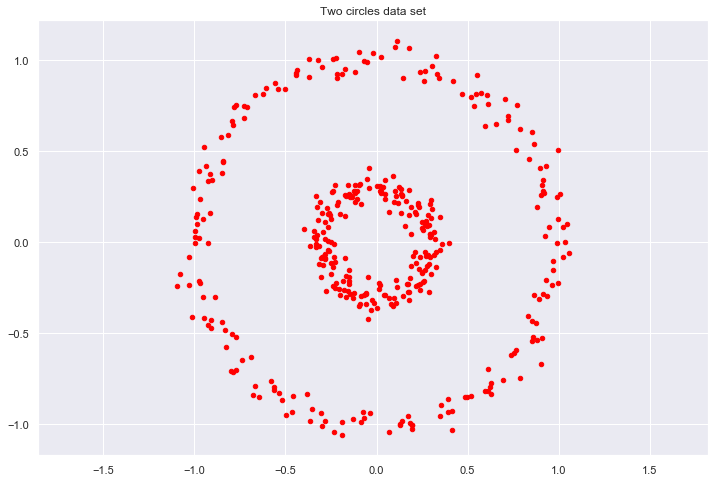

In [2]:
from sklearn.datasets import make_circles

np.random.seed(0)

X_circles, y_circles = make_circles(n_samples=400, factor=.3, noise=.05)

# Plot data
[X, y] = [X_circles, y_circles]
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], s=20, c="red");
plt.title("Two circles data set")
plt.axis('equal');

## "U" data set

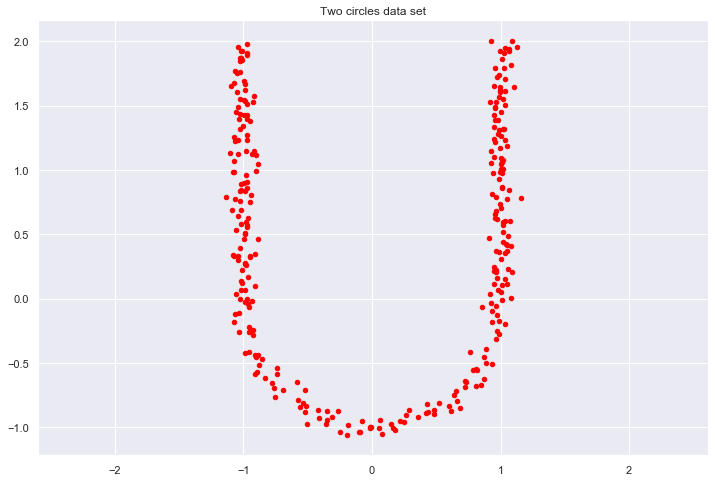

In [3]:
def u_data(npbr=100, noise_var=0.01):
    # npbr: number of data per branch
   
    x1a = np.linspace(1,1,npbr) + np.random.normal(0,noise_var,npbr)
    x2a = np.linspace(0,2,npbr) + np.random.normal(0,noise_var,npbr)

    x1b = np.linspace(-1,-1,npbr) + np.random.normal(0,noise_var,npbr)
    x2b = np.linspace(0,2,npbr) + np.random.normal(0,noise_var,npbr)

    theta = np.linspace(0, -np.pi, npbr)
    x1c = np.cos(theta) + np.random.normal(0,noise_var,npbr)
    x2c = np.sin(theta) + np.random.normal(0,noise_var,npbr)

    Xa = np.hstack((x1a.reshape(-1,1), x2a.reshape(-1,1)))
    Xb = np.hstack((x1b.reshape(-1,1), x2b.reshape(-1,1)))
    Xc = np.hstack((x1c.reshape(-1,1), x2c.reshape(-1,1)))

    X = np.vstack((Xa,Xb,Xc))

    return X

n_per_branch = 100 # number of points in each branch
noise_var = 0.05 # noise_variance

X_u = u_data(npbr=n_per_branch, noise_var=noise_var)

# Plot data
X = X_u
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], s=20, c="red");
plt.title("Two circles data set")
plt.axis('equal');

## KPCA on circles data

Now let us apply KPCA on the generated data

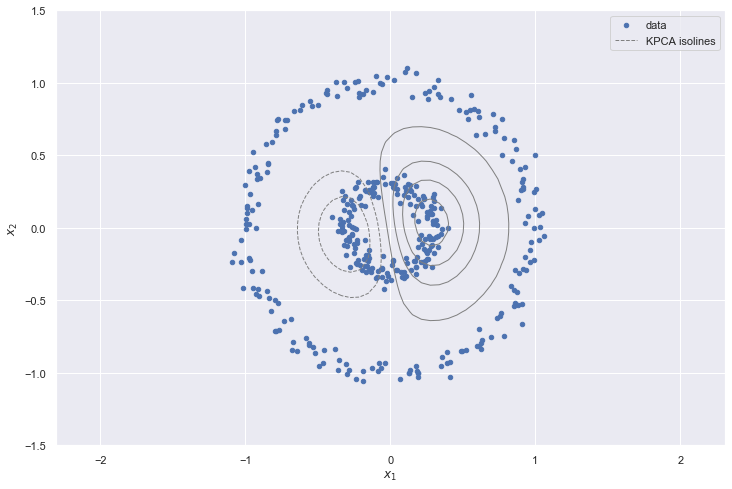

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=True, gamma=10, kernel='rbf',
          kernel_params=None, max_iter=None, n_components=None, n_jobs=None,
          random_state=None, remove_zero_eig=False, tol=0)

In [4]:
from sklearn.decomposition import KernelPCA

# circles data
X = X_circles

# Apply KPCA
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

# Plot results
plt.figure(figsize=(12,8))
plt.axis('equal')

plt.scatter(X[:, 0], X[:, 1], s=20, label='data')

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# grid of test data
X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T

# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
cs = plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')
cs.collections[0].set_label('KPCA isolines')

plt.legend()
plt.show()

kpca

In gray we plotted the contours of constant projection onto the first principal directions.

In [5]:
print('First 5 eigenvalues: {}'.format(kpca.lambdas_[0:5]))

First 5 eigenvalues: [42.7395692  40.45722555 40.08508031 17.15694279 16.93235579]


Now let us plot the contours of constant projection onto the principal directions 1 to 9.

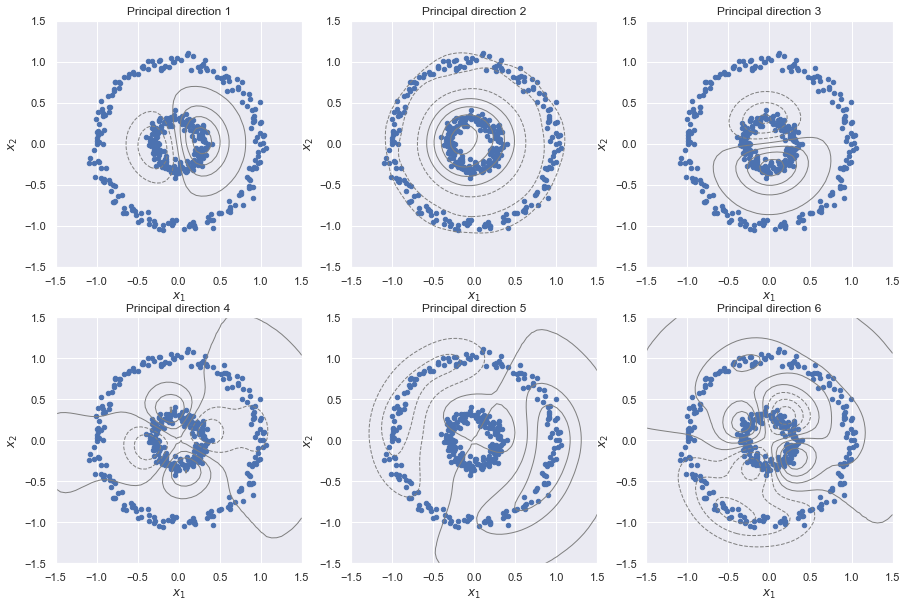

In [6]:
# Plot results

plt.figure(figsize=(15,10))

for i in np.arange(0,6):
    plt.subplot(2, 3, i+1, aspect='equal')
    plt.title("Principal direction %d"%(i+1))

    plt.scatter(X[:, 0], X[:, 1], s=20)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

    X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
    X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T

    # projection on the first principal component (in the phi space)
    Z_grid = kpca.transform(X_grid)[:, i].reshape(X1.shape)
    plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.show()

Add some color that allows to visualize the contour lines better:

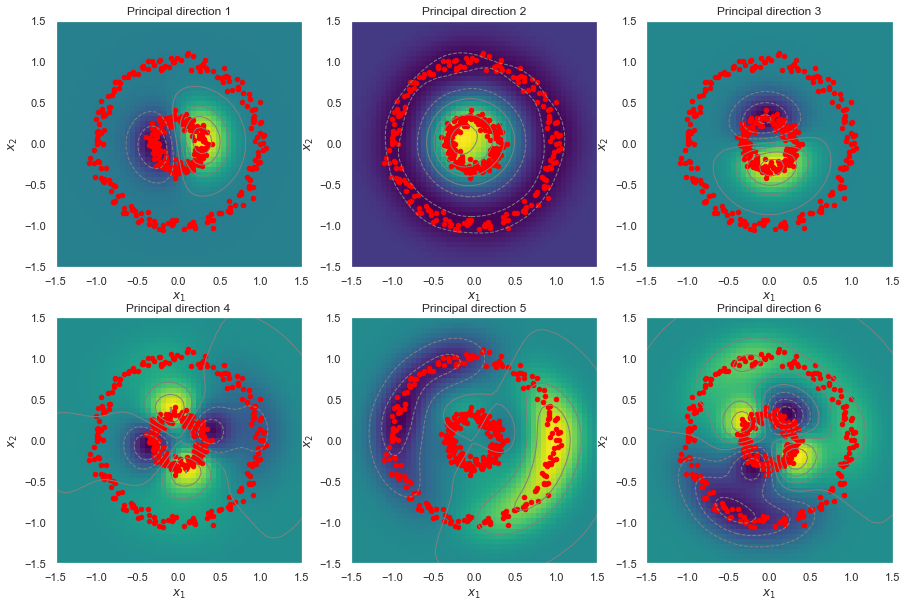

In [7]:
# Plot results

plt.figure(figsize=(15,10))

for i in np.arange(0,6):
    plt.subplot(2, 3, i+1, aspect='equal')
    plt.title("Principal direction %d"%(i+1))

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

    X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
    X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T

    # projection on the first principal component (in the phi space)
    Z_grid = kpca.transform(X_grid)[:, i].reshape(X1.shape)
    plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')
    
    plt.pcolormesh(X1, X2, Z_grid, cmap = 'viridis')

    plt.scatter(X[:, 0], X[:, 1], c="red", s=20)
    
plt.show()

Let us have a closer look at the retrieved components. We will plot component 1 vs component 2:

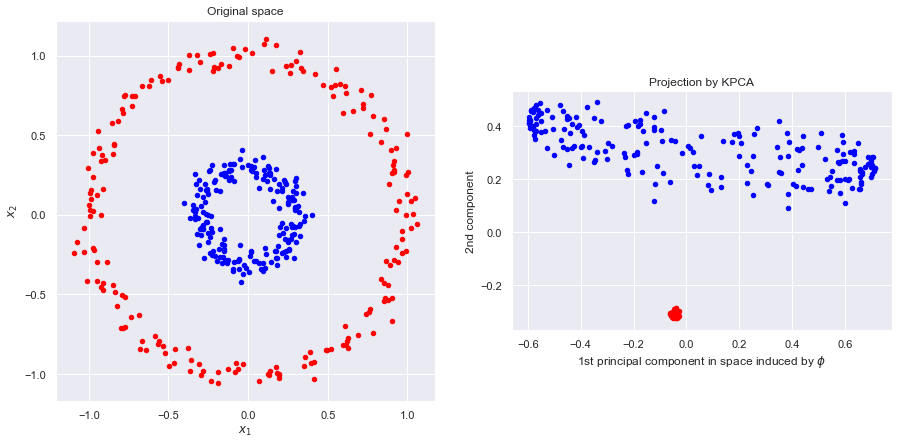

In [8]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X_circles[reds, 1], c="red", s=20)
plt.scatter(X[blues, 0], X_circles[blues, 1], c="blue", s=20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplot(1, 2, 2, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20)
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue", s=20)
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.show()

## KPCA on U data

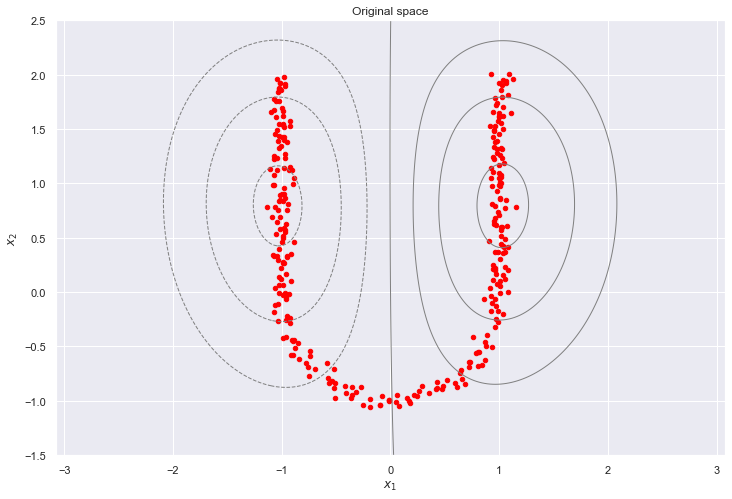

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=True, gamma=1, kernel='rbf', kernel_params=None,
          max_iter=None, n_components=None, n_jobs=None, random_state=None,
          remove_zero_eig=False, tol=0)

In [9]:
X = X_u

# Apply KPCA
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=1)
X_kpca = kpca.fit_transform(X)

# Plot results
plt.figure(figsize=(12,8))
plt.title("Original space")
plt.axis('equal')

plt.scatter(X[:, 0], X[:, 1], c="red", s=20)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-2.5, 2.5, 200), np.linspace(-1.5, 2.5, 200))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T

# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.show()

kpca

In [10]:
print('First 5 eigenvalues: {}'.format(kpca.lambdas_[0:5]))

First 5 eigenvalues: [67.86262466 50.11215644 37.85869795 29.30561213 17.48345581]


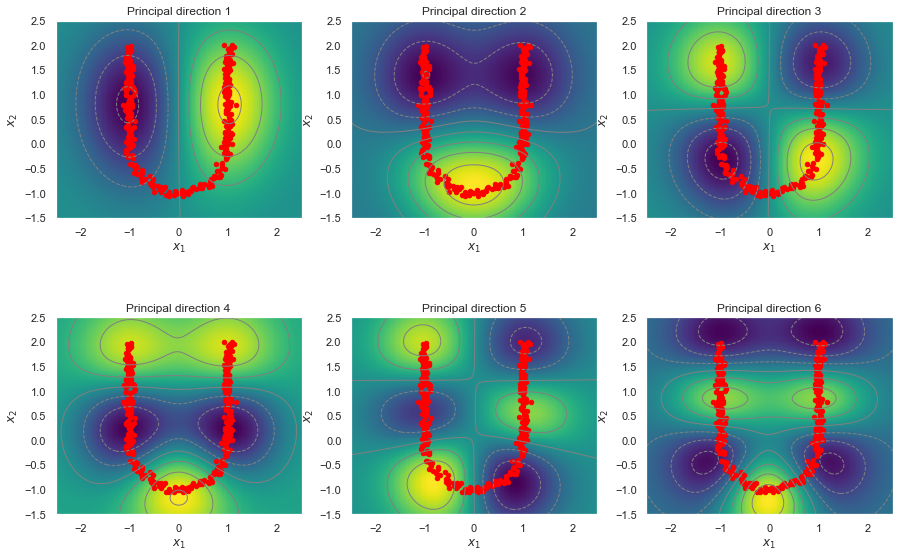

In [11]:
# Plot results

plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.linspace(-2.5, 2.5, 200), np.linspace(-1.5, 2.5, 200))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T

for i in np.arange(0,6):
    plt.subplot(2, 3, i+1, aspect='equal')
    plt.title("Principal direction %d"%(i+1))

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

    # projection on the first principal component (in the phi space)
    Z_grid = kpca.transform(X_grid)[:, i].reshape(X1.shape)
    plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')
    plt.pcolormesh(X1, X2, Z_grid, cmap = 'viridis')

    plt.scatter(X[:, 0], X[:, 1], c="red", s=20)
    
plt.show()

Let us have a closer look at the retrieved components. We will plot component 1 vs component 2:

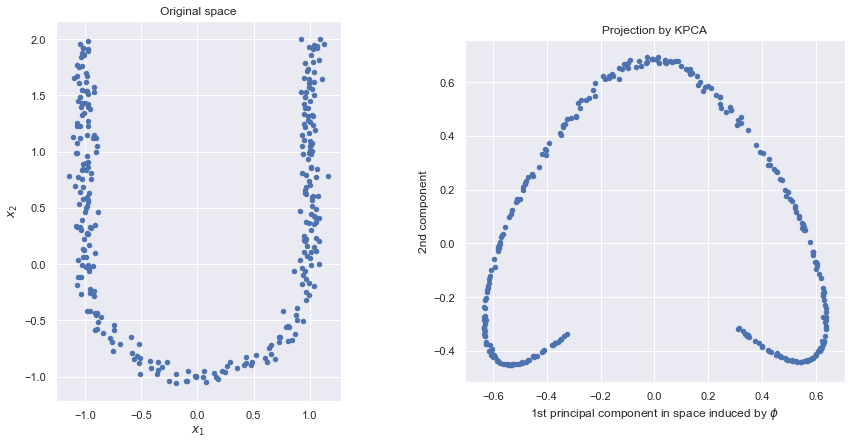

In [12]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1, aspect='equal')
plt.title("Original space")

plt.scatter(X[:, 0], X[:, 1], s=20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplot(1, 2, 2, aspect='equal')
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], s=20)
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.show()

## Exercise: KPCA with different kernels

Perform KPCA with different kernels on the "U" data set.

- Choose between "rbf", "poly", "linear" or a kernel defined by yourself.
- Try different parameter settings.

#### Unfolding the "U" data with KPCA
- Can you find a kernel and parameter setting for which the first two KPCA projections (right plot) map the data approximately to a 1D space?

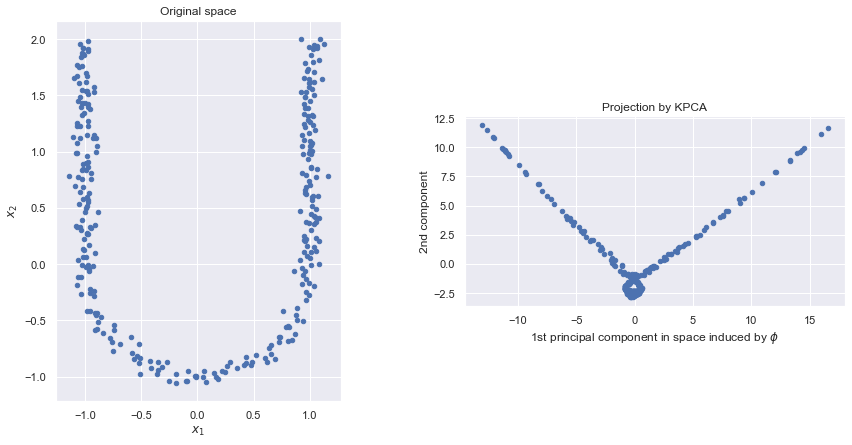

In [45]:
# Modify the next line
kpca = KernelPCA(kernel="poly", fit_inverse_transform=True, gamma=1,degree = 2,coef0 = 0.5)

X_kpca = kpca.fit_transform(X)

X_kpca = kpca.fit_transform(X_kpca)

plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1, aspect='equal')
plt.title("Original space")

plt.scatter(X[:, 0], X[:, 1], s=20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplot(1, 2, 2, aspect='equal')
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], s=20)
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.show()

# Part 2. KPCA for Denoising

As a dimensionality reduction technique, KPCA allows to recover the nonlinear manifold that underlies a given data set.
The manifold is spanned by a limited set of (kernel) principal directions, and by projecting the data onto this manifold it becomes possible to remove components of the data that contain mostly noise. 

We will apply KPCA for some simple denoising problem in the following examples. First, we define two data sets.

## Quarter circles data set

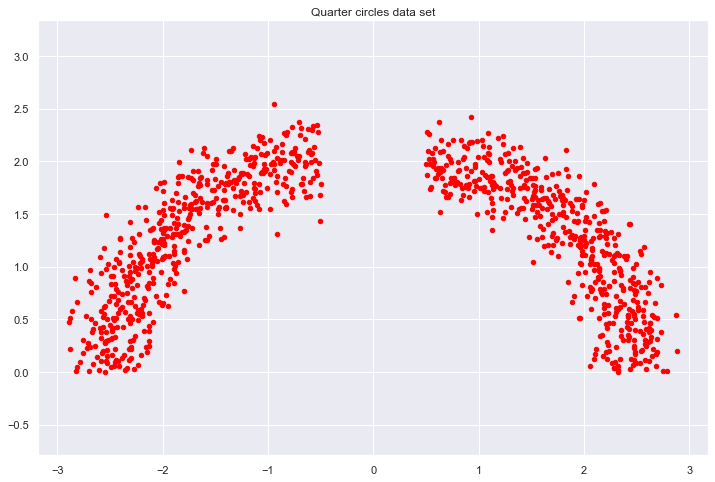

In [46]:
def quarter_circles_data(points=1000, radius=2, noise=None, *args, **kwargs):
    """
    Generates syntethic data in the shape of two quarter circles, as in
    the example from the paper by Mika et al.
    Arguments:
        points: number of points in the generated dataset.
        noise: name of the distribution to be used as additive noise.
               Use one of the distribution from numpy.random, see
               https://docs.scipy.org/doc/numpy-1.10.0/reference/routines.random.html
               Default is 'uniform', with low=-0.5 and high=0.5. Noise is added to
               the semi-circle's radious.
        args, kwargs: Any arguments you want to pass to the corresponding
                      numpy.random sampling function, except size.
    Returns:
        Arrays with the X and Y coordinates for the new data.
    """
    if noise is None:
        noise = 'uniform'
        kwargs['low'] = -0.5
        kwargs['high'] = 0.5
    kwargs['size'] = points // 2
    dist = getattr(np.random, noise)

    angles = np.linspace(0, np.pi/2, num=points//2)
    cos = np.cos(angles)
    sin = np.sin(angles)
    left_center = -0.5
    left_radius = radius + dist(*args, **kwargs)
    left_x = -left_radius*cos + left_center
    left_y = left_radius*sin
    right_center = 0.5
    right_radius = radius + dist(*args, **kwargs)
    right_x = right_radius*cos[::-1] + right_center
    right_y = right_radius*sin[::-1]
    
    x1 = np.hstack((left_x,right_x))
    x2 = np.hstack((left_y,right_y))
    X = np.hstack((x1.reshape(-1,1),x2.reshape(-1,1)))
    
    return X

X_quarter = quarter_circles_data(noise='normal', scale=0.2)

# Plot data
X = X_quarter
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], s=20, c="red");
plt.title("Quarter circles data set")
plt.axis('equal');

## Square data set

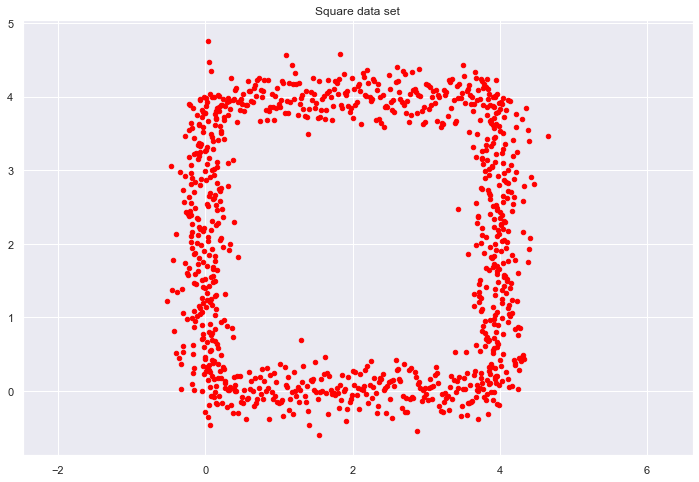

In [47]:
def get_square(points=1000, length=4, noise=None, *args, **kwargs):
    """
    Generates syntethic data in the shape of a square.
    Arguments:
        points: number of points in the generated dataset.
        noise: name of the distribution to be used as additive noise.
               Use one of the distribution from numpy.random, see
               https://docs.scipy.org/doc/numpy-1.10.0/reference/routines.random.html
               Default is 'uniform', with low=-0.5 and high=0.5. Noise is added
               in the direction orthogonal to the current side.
        args, kwargs: Any arguments you want to pass to the corresponding
                      numpy.random sampling function, except size.
    Returns:
        Arrays with the X and Y coordinates for the new data.
    """
    if noise is None:
        noise = 'uniform'
        kwargs['low'] = -0.5
        kwargs['high'] = 0.5
    kwargs['size'] = points // 4
    dist = getattr(np.random, noise)

    real_values = np.linspace(0, length, num=points//4)
    x_values = []
    y_values = []
    # Left side
    x_values.append(dist(*args, **kwargs))
    y_values.append(real_values)
    # Right side
    x_values.append(dist(*args, **kwargs) + length)
    y_values.append(real_values)
    # Top side
    x_values.append(real_values)
    y_values.append(dist(*args, **kwargs) + length)
    # Bottom side
    x_values.append(real_values)
    y_values.append(dist(*args, **kwargs))
    
    X = np.hstack((np.array(x_values).reshape(-1,1),np.array(y_values).reshape(-1,1)))
    
    return X

X_square = get_square(noise='normal', scale=0.2)

# Plot data
X = X_square
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], s=20, c="red");
plt.title("Square data set")
plt.axis('equal');

Now, we apply KPCA, project the data onto a limited number of principal directions in feature space.
And, finally, we apply the inverse transform to obtain pre-images of the data in the input space.

C:\Users\Dave Mont\Anaconda3\lib\site-packages\sklearn\utils\extmath.py:516: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


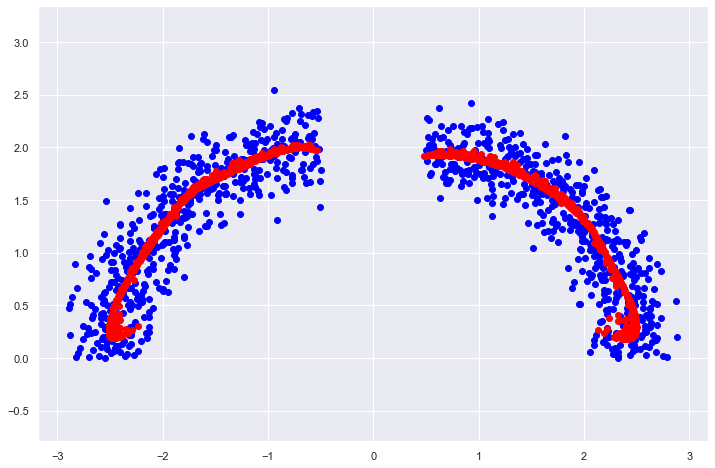

In [48]:
X = X_quarter

# apply KPCA and maintain only a limited number of components
kpca = KernelPCA(n_components=5, kernel="rbf", fit_inverse_transform=True, gamma=1)
X_kpca = kpca.fit_transform(X)

# obtain the pre-images in the input space
X_back = kpca.inverse_transform(X_kpca)

plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],color='blue')
plt.scatter(X_back[:,0],X_back[:,1],color='red')
plt.axis('equal')
plt.show()

As we can observe, the red pre-images represent denoised versions of the original data.

We now repeat this experiment with a noisy data set shaped as a square:

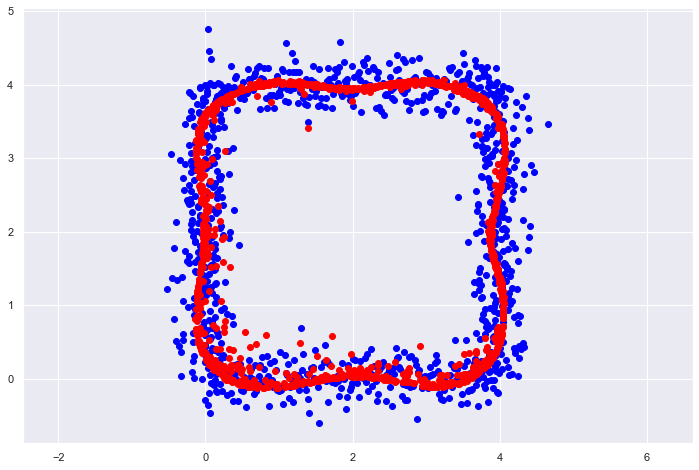

In [49]:
X = X_square

# apply KPCA and maintain only a limited number of components
kpca = KernelPCA(n_components=5, kernel="rbf", fit_inverse_transform=True, gamma=1)
X_kpca = kpca.fit_transform(X)

# obtain the pre-images in the input space
X_back = kpca.inverse_transform(X_kpca)

plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],color='blue')
plt.scatter(X_back[:,0],X_back[:,1],color='red')
plt.axis('equal')
plt.show()

# Part 2. Kernel-based clustering techniques

- **Kernel K-means** is a direct extension of K-means in the kernel feature space
- **Spectral clustering** is performed by applying KPCA followed by K-means on the principal components.

The scikit-learn implementation of spectral clustering can be found here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

Let us apply kernel K-means on the 2 circles data set.
Note that kernel K-means is not included in scikit-learn.
KernelKMeans we will be using a scikit-learn compatible 3rd party implementation.

In [50]:
from kernel_kmeans import KernelKMeans

## Exercise: Kernel K-means parameters

In the next code block, set an appropriate kernel parameter for kernel K-means such that it finds the clusters correctly.

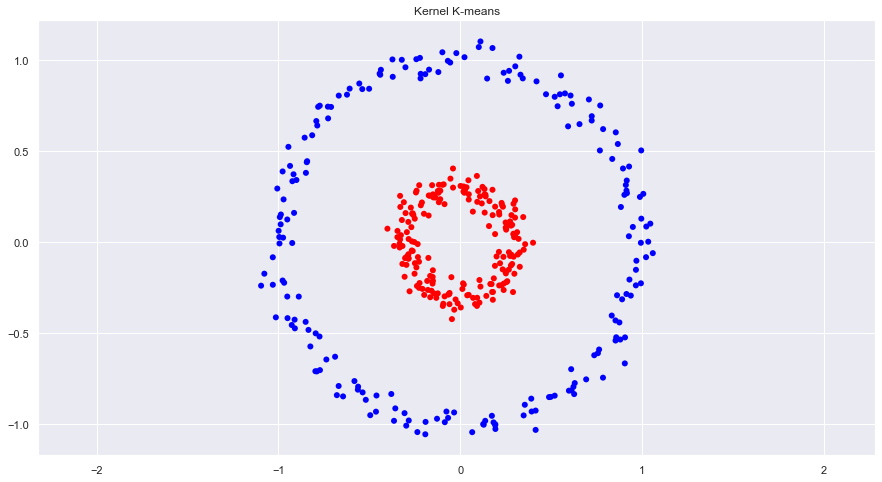

In [56]:
kkm = KernelKMeans(n_clusters=2, random_state=0, kernel='rbf', gamma=5)

X = X_circles
y_pred = kkm.fit_predict(X)

plt.figure(figsize=(15,8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='bwr', edgecolors='none')
plt.title('Kernel K-means')
plt.axis('equal')
plt.show()

In [57]:
from sklearn import cluster

## Exercise: Spectral clustering parameters

In the next code block, set an appropriate kernel parameter for spectral clustering such that it finds the clusters correctly.

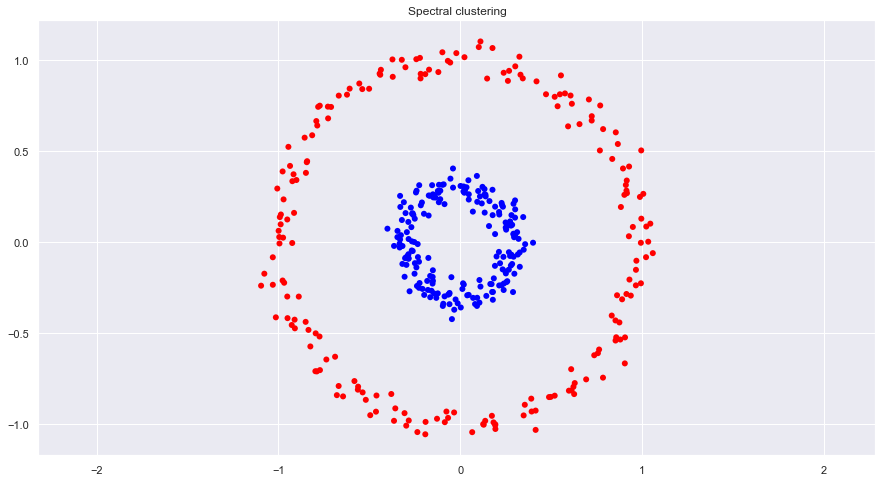

In [62]:
spc = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack',
        affinity="rbf",gamma=10,n_jobs=2,random_state=0)

X = X_circles
y_pred = spc.fit_predict(X)

plt.figure(figsize=(15,8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='bwr', edgecolors='none')
plt.title('Spectral clustering')
plt.axis('equal')
plt.show()

In [63]:
kkm

KernelKMeans(coef0=1, degree=3, gamma=5, kernel='rbf', kernel_params=None,
             max_iter=50, n_clusters=2, random_state=0, tol=0.001, verbose=0)

In [64]:
spc

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver='arpack', eigen_tol=0.0, gamma=10,
                   kernel_params=None, n_clusters=2, n_init=10, n_jobs=2,
                   n_neighbors=10, random_state=0)

## Two moons data set

Let us try both techniques on another data set.

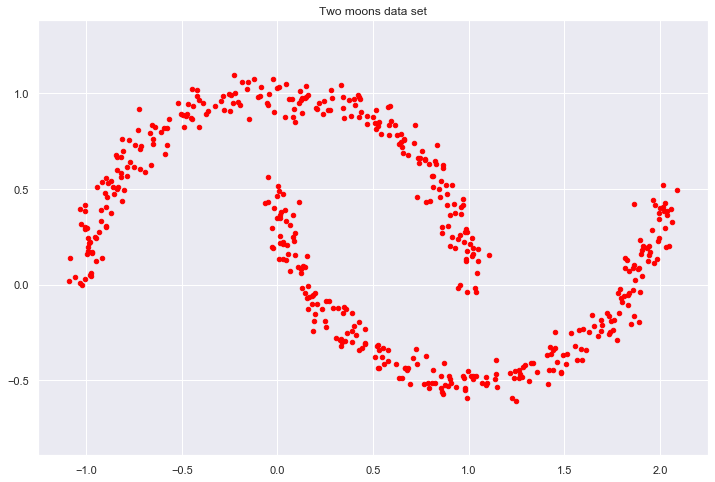

In [65]:
n_samples = 500

X_moons, y_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

# Plot data
[X, y] = [X_moons, y_moons]
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], s=20, c="red");
plt.title("Two moons data set")
plt.axis('equal');

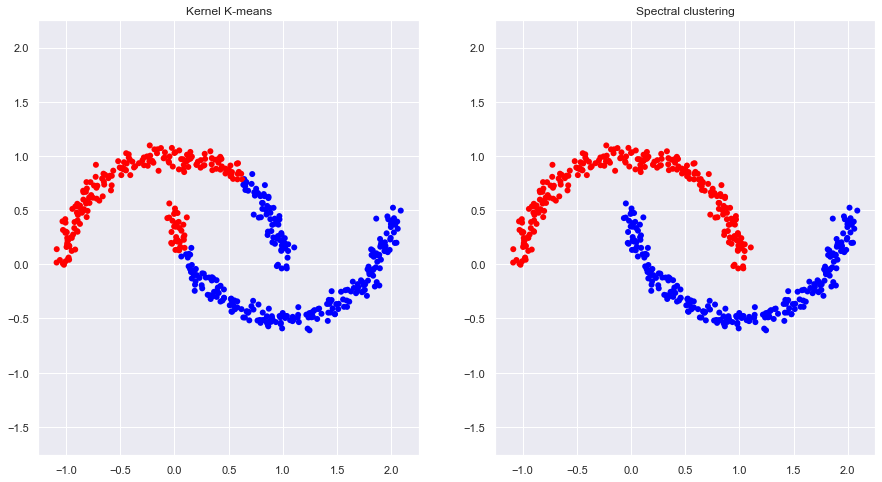

In [90]:
kkm = KernelKMeans(n_clusters=2,random_state=0, kernel='cosine', gamma=1,degree = 5)

spc = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack',
        affinity="rbf",gamma=15,n_jobs=2,random_state=0)

X = X_moons

y_pred1 = kkm.fit_predict(X)
y_pred2 = spc.fit_predict(X)

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred1, cmap='bwr', edgecolors='none')
plt.title('Kernel K-means')
plt.axis('equal')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=y_pred2, cmap='bwr', edgecolors='none')
plt.title('Spectral clustering')
plt.axis('equal')

plt.show()

Can you find a suitable parameter for kernel K-means?

## Two spirals data set

Now we apply spectral clustering on the "two spirals" data set:

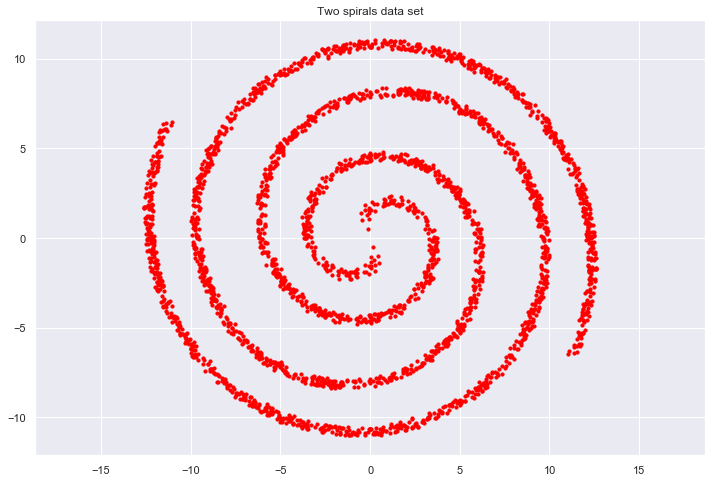

In [91]:
def two_spirals_data(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    theta = .5+np.sqrt(np.random.rand(n_points,1)) * 720 * (2*np.pi)/360
    d1x = -np.cos(theta)*theta + np.random.rand(n_points,1) * noise
    d1y = np.sin(theta)*theta + np.random.rand(n_points,1) * noise
    
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

n_points = 1500
X_spirals, y_spirals = two_spirals_data(n_points = n_points)

# Plot data
[X, y] = [X_spirals, y_spirals]
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], s=10, c="red");
plt.title("Two spirals data set")
plt.axis('equal');

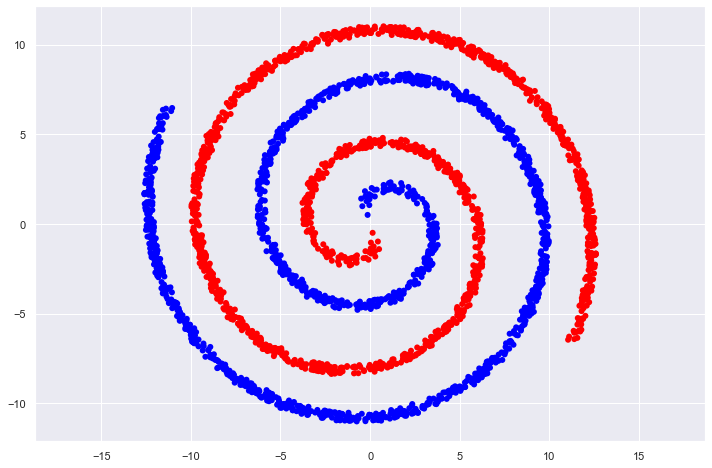

Elapsed time: 23.16 s.


In [92]:
from time import time

spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack',
        affinity="nearest_neighbors",n_jobs=2)

X = X_spirals
start = time()
y_pred1 = spectral.fit_predict(X)
elapsed = time() - start

plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred1, cmap='bwr', edgecolors='none')
plt.axis('equal')

plt.show()

print("Elapsed time: %.2f s."%elapsed)

## Concentric circles data set

Finally, we create a set of concentric circles:

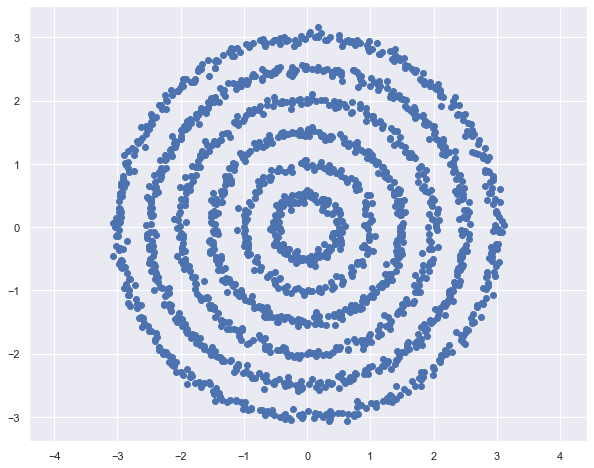

Number of points: 1800


In [93]:
def concentric_circles_data(n_circle_pairs=2,n_samples_unit=300):

    # initialize X and y as empty
    X = np.empty((0,2), int)
    y = np.empty((0,), int)

    for i in np.arange(0,n_circle_pairs):
        Xi,yi = datasets.make_circles(n_samples=np.round(n_samples_unit*(1+i)),
                                      factor=(.5+i)/(1+i), noise=.05/(1+i))

        X = np.concatenate((X,Xi*(1+i)),axis=0)
        y = np.concatenate((y,yi+2*i),axis=0)

    return X,y

n_circle_pairs = 3
n_samples_unit = 300

X_circles, y_circles = concentric_circles_data(n_circle_pairs,n_samples_unit)

X, y = X_circles, y_circles

plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],cmap='viridis')
plt.axis('equal')
plt.show()

print('Number of points: %d'%len(y))

And we apply spectral clustering:

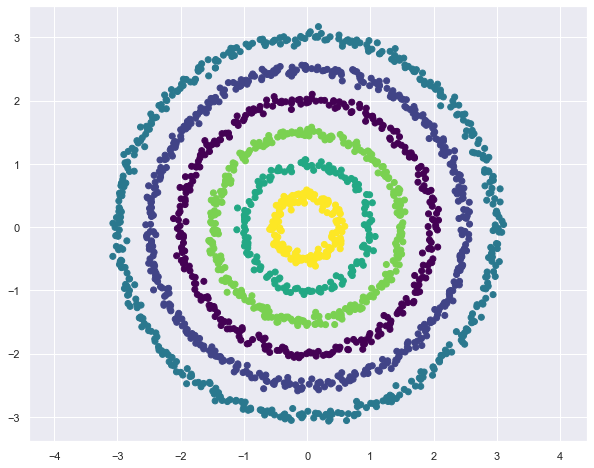

Elapsed time: 18.26 s.


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=100.0,
                   kernel_params=None, n_clusters=6, n_init=10, n_jobs=2,
                   n_neighbors=10, random_state=None)

In [94]:
from sklearn.cluster import SpectralClustering

spc = SpectralClustering(n_clusters=n_circle_pairs*2, n_init=10,
                         gamma=100.0, affinity='rbf', n_jobs=2)

start = time()
y_pred = spc.fit_predict(X)
elapsed = time() - start

plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c=y_pred,cmap='viridis')
plt.axis('equal')
plt.show()

print("Elapsed time: %.2f s."%elapsed)

spc

## Exercise: Moving targets

In this exercise we will apply clustering to perform target tracking of two objects ("sources").

Consider two sources, one located at [1,0] and another located at [-1,0].
At each time instant, for `t=0,1,2,\dots`, we observe the location of one of the two source.
However, we do not know beforehand which source is active at each time instant.

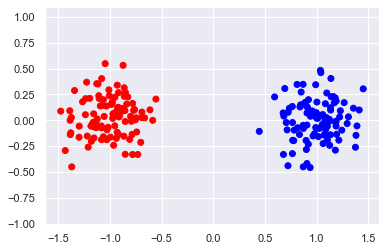

In [95]:
# generate data

np.random.seed(0)

n_points = 200
noise_scale = 0.2

y = np.random.randint(2,size=n_points)

x1 = np.ones(n_points) + np.random.normal(scale=noise_scale,size=n_points)
x2 = np.zeros(n_points) + np.random.normal(scale=noise_scale,size=n_points)

X = np.hstack((x1.reshape(-1,1),x2.reshape(-1,1)))
X[y==1] *= -1

plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
plt.axis('equal')
plt.show()

Now imagine the sources are moving in a circular fashion in time.
We simulate this by setting the `final_angle` parameter to `2*np.pi`.

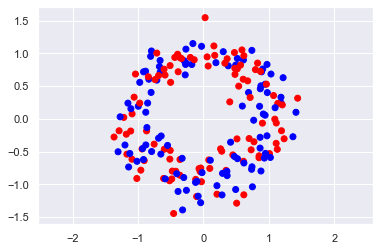

In [96]:
# generate data
np.random.seed(0)

n_points = 200
noise_scale = 0.2

#final_angle = np.pi/2
final_angle = 2*np.pi

y = np.random.randint(2,size=n_points)

theta = np.linspace(0,final_angle,n_points)
x1 = np.cos(theta) + np.random.normal(scale=noise_scale,size=n_points)
x2 = np.sin(theta) + np.random.normal(scale=noise_scale,size=n_points)

X = np.hstack((x1.reshape(-1,1),x2.reshape(-1,1)))
X[y==1] *= -1

plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr')
plt.axis('equal')
plt.show()

With only access to the observations X, how could we cluster these points into groups that correspond to the two sources?

One option is to take into a account the temporal dimension.
In this exercise, you will do the following:
1. Add a new dimension with a "temporal index" to the data, i.e. construct an "extended" data set `X_ext = [X0, X1, t]`. The temporal index `t` should be a scaled version of the data indices.
2. Then, run spectral clustering on the extended data. Tune the parameters of spectral clustering such that it obtains a clustering error of 0 data points.
3. Plot the result of the clustering in 3D using Plotly.

In [151]:
# 1. Generate the extended data

# generate data
np.random.seed(0)

n_points = 200
noise_scale = 0.2

final_angle = 2*np.pi

y = np.random.randint(2,size=n_points)

theta = np.linspace(0,final_angle,n_points)
x1 = np.cos(theta) + np.random.normal(scale=noise_scale,size=n_points)
x2 = np.sin(theta) + np.random.normal(scale=noise_scale,size=n_points)

X = np.hstack((x1.reshape(-1,1),x2.reshape(-1,1)))
X[y==1] *= -1

### change the next line: ###
Z = np.arange(200)/50

X_ext = np.hstack((X,Z.reshape(-1,1)))

In [152]:
# 2. Perform spectral clustering

### Replace the parameters to tune spectral clustering ###
spc = cluster.SpectralClustering(gamma=1,
        n_clusters=2, eigen_solver='arpack',
        affinity="nearest_neighbors",n_jobs=2)

# spectral clustering on the extended data set
y_pred = spc.fit_predict(X_ext)

errors_a = (y != y_pred).sum()
errors_b = (y != 1-y_pred).sum()

print('Misclustered samples: %d' % np.minimum(errors_a,errors_b))

Misclustered samples: 0


C:\Users\Dave Mont\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



In [99]:
"""
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install plotly
"""

# load Plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go

# initiate the Plotly Notebook mode
init_notebook_mode(connected=True)

In [100]:
# 3. Plot the data using Plotly

def plot_3D(X, y):
    
    # retrieve indices of zeroes and ones
    idx0 = y==0
    idx1 = y==1
    
    # define data set 1 plot options
    trace0 = go.Scatter3d(x=X[idx0,0], y=X[idx0,1], z=X[idx0,2],
        mode='markers',
        marker=dict(size=6, color='red', opacity=0.8)
    )

    # define data set 2 plot options
    trace1 = go.Scatter3d(x=X[idx1,0], y=X[idx1,1], z=X[idx1,2],
        mode='markers',
        marker=dict(size=6, color='blue', opacity=0.8)
    )

    # set aspect ratio
    scene = dict(aspectmode="manual", aspectratio=dict(x=1, y=1, z=1))

    # define figure properties
    layout = go.Layout(
        scene=scene,
        height=600,
        width=900
    )

    # produce the plot
    fig = go.Figure(data=[trace0,trace1],layout=layout)
    iplot(fig)

In [101]:
plot_3D(X_ext,y_pred)

# Part 4. Spectral clustering for image segmentation

Finally, we will analyze a simple application of spectral clustering for image segmentation.

In this example, an image with connected circles is generated and spectral clustering is used to separate the circles.

In these settings, the Spectral clustering approach solves the problem know as "normalized graph cuts": the image is seen as a graph of connected voxels, and the spectral clustering algorithm amounts to choosing graph cuts defining regions while minimizing the ratio of the gradient along the cut, and the volume of the region.

As the algorithm tries to balance the volume (i.e. balance the region sizes), if we take circles with different sizes, the segmentation fails.

In addition, as there is no useful information in the intensity of the image, or its gradient, we choose to perform the spectral clustering on a graph that is only weakly informed by the gradient.
This is close to performing a Voronoi partition of the graph.

In addition, we use the mask of the objects to restrict the graph to the outline of the objects.
In this example, we are interested in separating the objects one from the other, and not from the background.

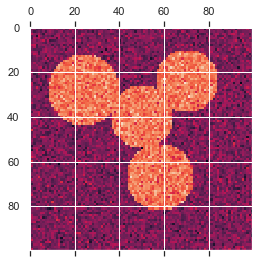

In [153]:
# Authors:  Emmanuelle Gouillart <emmanuelle.gouillart@normalesup.org>
#           Gael Varoquaux <gael.varoquaux@normalesup.org>
# License: BSD 3 clause

# generate the data for the image

l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

# 4 circles
img = circle1 + circle2 + circle3 + circle4
mask = img.astype(bool)
img = img.astype(float)

# add noise
img += 1 + 0.2 * np.random.randn(*img.shape)

plt.matshow(img)
plt.show()

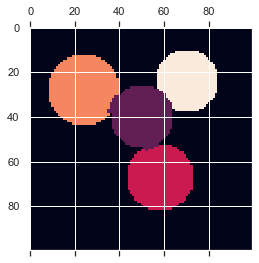

In [154]:
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependent from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data / graph.data.std())

# Force the solver to be arpack, since amg is numerically
# unstable on this example
labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = -np.ones(mask.shape)
label_im[mask] = labels

plt.matshow(label_im)
plt.show()

# Additional reading

"Comparing different clustering algorithms on toy datasets": https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html